# Summary plots for Project 1, Deep Learning

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('whitegrid')

In [4]:
df = pd.read_csv('./export.csv')

In [5]:
name_map = {
    'resnet18_not_pretrained' : 'ResNet18',
    'resnet18_pretrained': 'Pretrained ResNet18',
    'simple_cnn': 'Simple CNN',
    'simple_nn': 'Simple NN'
}

In [6]:
df.model_name = df.model_name.apply(lambda x: name_map[x])

In [7]:
df.head()

,Tags,model_name,final_metrics/train_accuracy,final_metrics/test_accuracy,parameters/epochs,parameters/lr,parameters/batch_size,parameters/seed,parameters/momentum,parameters/regularisation_L2,parameters/regularisation_dropout,data_augumentation_param,data_augumentation
0,"[""augment"",""mixup""]",Pretrained ResNet18,0.62,0.79,10,0.003,16,1265,0.0,0.0,0.0,0.9,mixup
1,"[""augment"",""mixup""]",Pretrained ResNet18,0.85,0.76,10,0.003,16,33556,0.0,0.0,0.0,0.7,mixup
2,"[""augment"",""mixup""]",Pretrained ResNet18,0.85,0.74,10,0.003,16,55446,0.0,0.0,0.0,0.5,mixup
3,"[""augment"",""mixup""]",Pretrained ResNet18,0.67,0.81,10,0.003,16,1265,0.0,0.0,0.0,0.9,mixup
4,"[""augment"",""mixup""]",Pretrained ResNet18,0.81,0.76,10,0.003,16,33556,0.0,0.0,0.0,0.7,mixup


## Boxplot of accuracy from different architectures

In [8]:
df1 = df[df.Tags.str.contains('train')].copy()

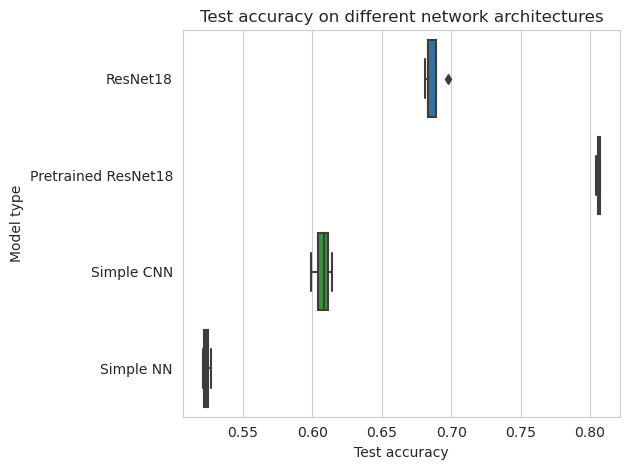

In [9]:
sns.boxplot(y='model_name', x='final_metrics/test_accuracy', data=df1)
plt.xlabel('Test accuracy')
plt.ylabel('Model type')
plt.title('Test accuracy on different network architectures')

plt.tight_layout()
plt.savefig('model_accuracy.pdf')
plt.show()

## Heatmap with p-values of Welsh's test

In [10]:
from scipy.stats import ttest_ind
from functools import partial

In [11]:
welsh_test = partial(ttest_ind, equal_var=False)

In [12]:
def extract_results_for_architecture(arch):
    return df1[df1.model_name == arch]['final_metrics/test_accuracy'].tolist()

In [13]:
architectures = list(name_map.values())

In [14]:
p_values = {}

for a in architectures:
    p_values[a] = {}

In [15]:
for arch1 in architectures:
    x1 = extract_results_for_architecture(arch1)
    for arch2 in architectures:
        x2 = extract_results_for_architecture(arch2)
        _, p = welsh_test(x1, x2)

        p_values[arch1][arch2] = p
        p_values[arch2][arch1] = p

In [16]:
p_values = pd.DataFrame.from_dict(p_values)

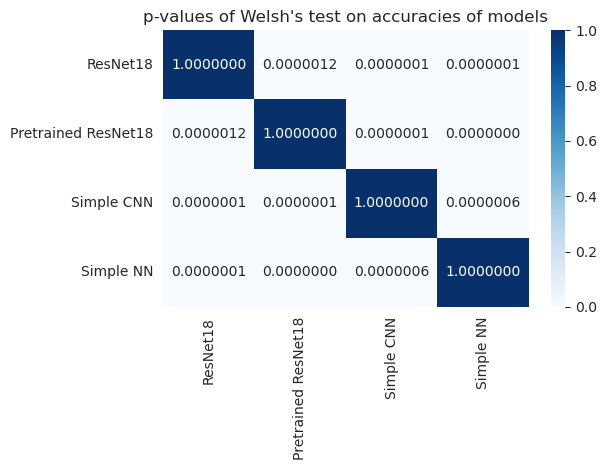

In [17]:
sns.heatmap(p_values, annot=True, fmt=".7f", cmap='Blues')
plt.title("p-values of Welsh's test on accuracies of models")

plt.tight_layout()
plt.savefig('model_p_values.pdf')
plt.show()

## Influence of learning rate

In [18]:
df2 = df[df.Tags.str.contains('lr')].copy()

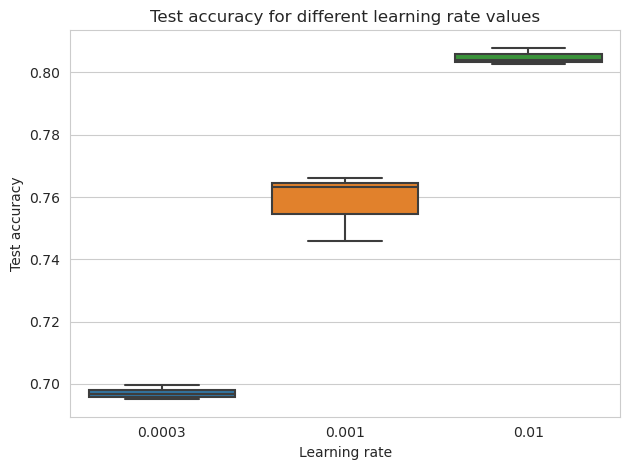

In [19]:
sns.boxplot(x='parameters/lr', y='final_metrics/test_accuracy', data=df2)
plt.ylabel('Test accuracy')
plt.xlabel('Learning rate')
plt.title('Test accuracy for different learning rate values')

plt.tight_layout()
plt.savefig('model_lr.pdf')
plt.show()

## Influence of batch size

In [20]:
df2 = df[df.Tags.str.contains('batch')].copy()

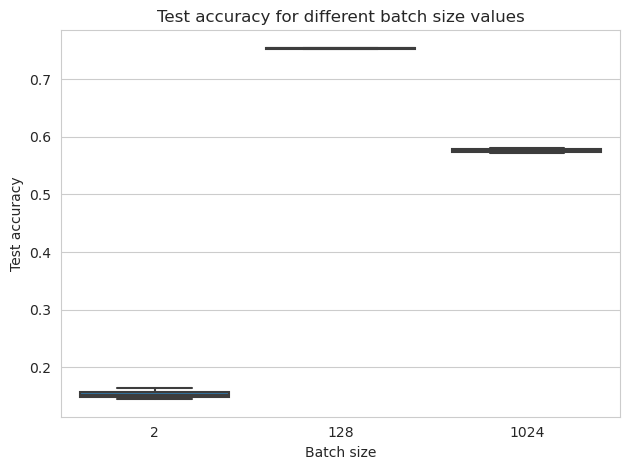

In [21]:
sns.boxplot(x='parameters/batch_size', y='final_metrics/test_accuracy', data=df2)
plt.ylabel('Test accuracy')
plt.xlabel('Batch size')
plt.title('Test accuracy for different batch size values')

plt.tight_layout()
plt.savefig('model_batch.pdf')
plt.show()

## Influence of momentum

In [22]:
df2 = df[df.Tags.str.contains('moment')].copy()

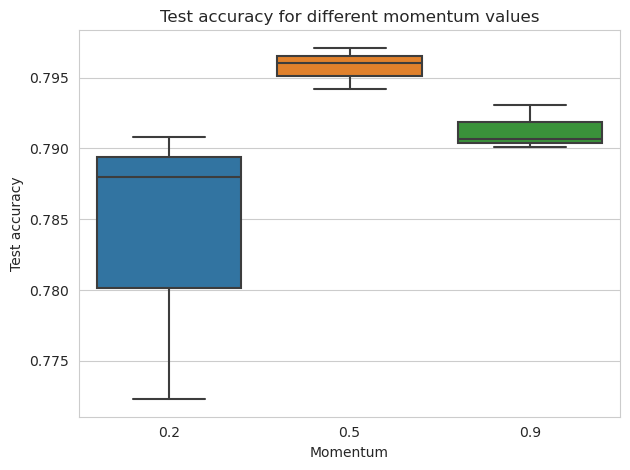

In [23]:
sns.boxplot(x='parameters/momentum', y='final_metrics/test_accuracy', data=df2)
plt.ylabel('Test accuracy')
plt.xlabel('Momentum')
plt.title('Test accuracy for different momentum values')

plt.tight_layout()
plt.savefig('model_momentum.pdf')
plt.show()

## Influence of dropout probability

In [24]:
df2 = df[df.Tags.str.contains('reg_dropout')].copy()

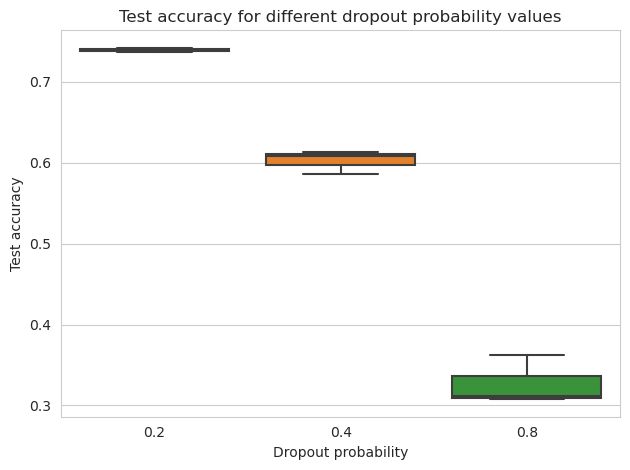

In [25]:
sns.boxplot(x='parameters/regularisation_dropout', y='final_metrics/test_accuracy', data=df2)
plt.ylabel('Test accuracy')
plt.xlabel('Dropout probability')
plt.title('Test accuracy for different dropout probability values')

plt.tight_layout()
plt.savefig('model_dropout.pdf')
plt.show()

## Influence of L2 regularisation

In [26]:
df2 = df[df.Tags.str.contains('reg_l2')].copy()

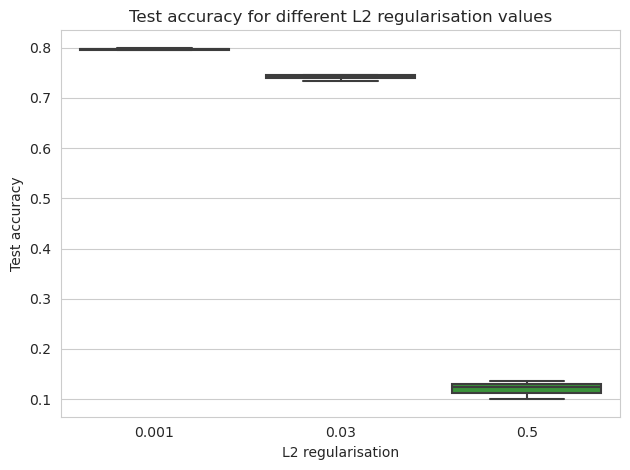

In [27]:
sns.boxplot(x='parameters/regularisation_L2', y='final_metrics/test_accuracy', data=df2)
plt.ylabel('Test accuracy')
plt.xlabel('L2 regularisation')
plt.title('Test accuracy for different L2 regularisation values')

plt.tight_layout()
plt.savefig('model_l2.pdf')
plt.show()

## Influence of Random Crop

In [28]:
df2 = df[df.Tags.str.contains('crop')].copy()

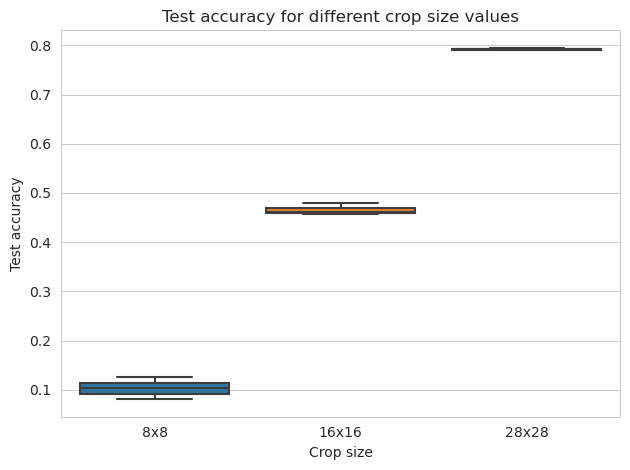

In [29]:
sns.boxplot(x='data_augumentation_param', y='final_metrics/test_accuracy', data=df2)
plt.ylabel('Test accuracy')
plt.xlabel('Crop size')
plt.title('Test accuracy for different crop size values')
plt.xticks([0, 1, 2], ['8x8', '16x16', '28x28'])

plt.tight_layout()
plt.savefig('model_crop.pdf')
plt.show()

## Influence of Random Rotation

In [30]:
df2 = df[df.Tags.str.contains('rotate')].copy()

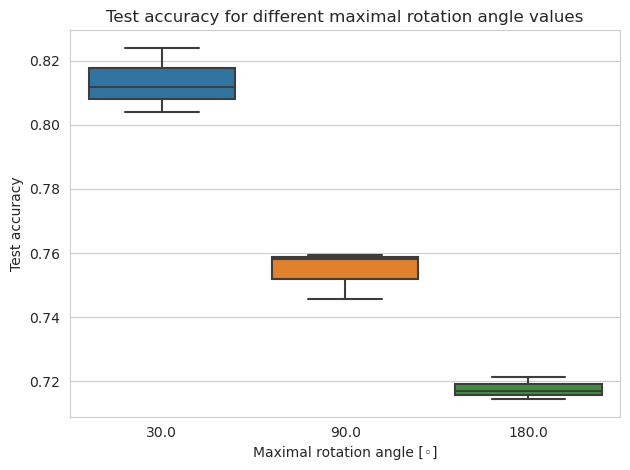

In [31]:
sns.boxplot(x='data_augumentation_param', y='final_metrics/test_accuracy', data=df2)
plt.ylabel('Test accuracy')
plt.xlabel('Maximal rotation angle [◦]')
plt.title('Test accuracy for different maximal rotation angle values')

plt.tight_layout()
plt.savefig('model_rotate.pdf')
plt.show()

## Influence of Random Rotation

In [32]:
df2 = df[df.Tags.str.contains('jitter')].copy()

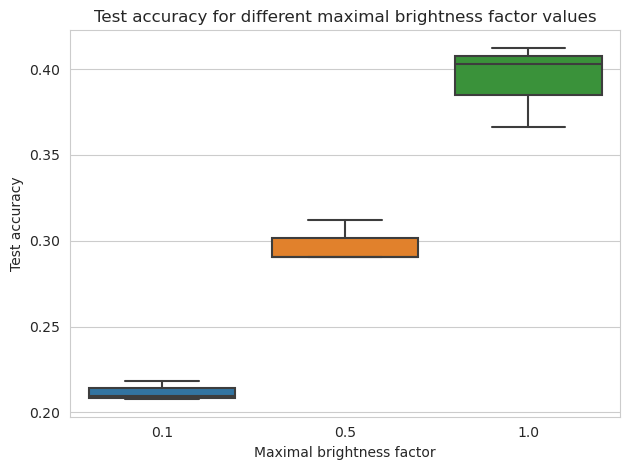

In [33]:
sns.boxplot(x='data_augumentation_param', y='final_metrics/test_accuracy', data=df2)
plt.ylabel('Test accuracy')
plt.xlabel('Maximal brightness factor')
plt.title('Test accuracy for different maximal brightness factor values')

plt.tight_layout()
plt.savefig('model_jitter.pdf')
plt.show()

## Influence of Random MixUp

In [34]:
df2 = df[df.Tags.str.contains('mixup')].copy()

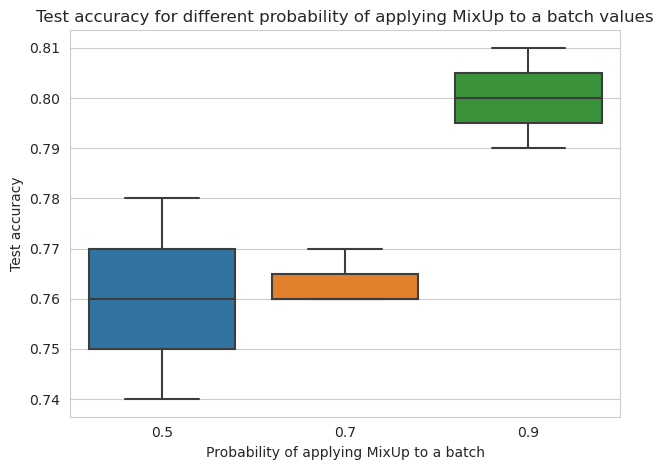

In [35]:
sns.boxplot(x='data_augumentation_param', y='final_metrics/test_accuracy', data=df2)
plt.ylabel('Test accuracy')
plt.xlabel('Probability of applying MixUp to a batch')
plt.title('Test accuracy for different probability of applying MixUp to a batch values')

plt.tight_layout()
plt.savefig('model_mixup.pdf')
plt.show()